In [1]:
import numpy as np
from cdlib import algorithms, viz, evaluation
import networkx as nx
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
with open('../pkl/COVID_sorted_W_tensors.pkl', 'rb') as f:
    travel_tensors_raw = pickle.load(f) 

Text(0.5, 0, 'City numbering')

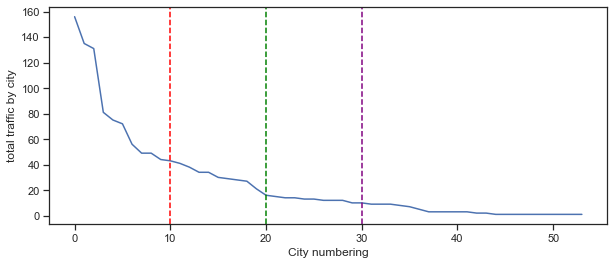

In [3]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.plot(np.sum(np.sum(travel_tensors_raw, axis=0)[:54,:54], axis=0))
plt.axvline(x=10, linestyle='--', color='red')
plt.axvline(x=20, linestyle='--', color='green')
plt.axvline(x=30, linestyle='--', color='purple')
plt.ylabel("total traffic by city")
plt.xlabel("City numbering")

In [4]:
country_cutline = 54 # 69, 70 give None homogeneity
travel_tensors = travel_tensors_raw[:,0:country_cutline,0:country_cutline]

In [5]:
travel_tensors_raw.shape

(21, 54, 108)

In [6]:
adj_list = travel_tensors_raw[:,:country_cutline,:country_cutline]

In [7]:
# with open('../pkl/COVID_sorted_home_adj.pkl', 'rb') as f:
#     home_adj_list_raw = pickle.load(f) 
with open('../pkl/COVID_sorted_home_weekly.pkl', 'rb') as f:
    home_adj_list_raw = pickle.load(f) 

In [8]:
len(home_adj_list_raw)

21

Text(0.5, 0, 'Country numbering')

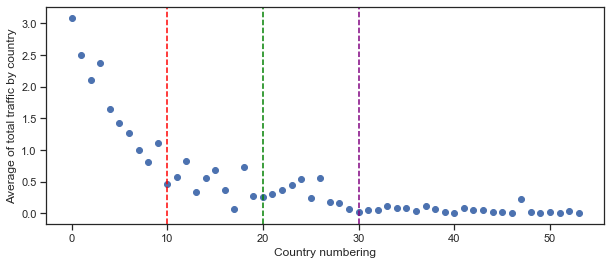

In [9]:
# How to set a cutline
plt.figure(figsize=(10,4))
plt.scatter(range(54), np.mean(np.sum(home_adj_list_raw, axis=0)[:54,:54], axis=0))
plt.axvline(x=10, linestyle='--', color='red')
plt.axvline(x=20, linestyle='--', color='green')
plt.axvline(x=30, linestyle='--', color='purple')
plt.ylabel("Average of total traffic by country")
plt.xlabel("Country numbering")

In [10]:
home_adj_list = np.array(home_adj_list_raw)[:,0:country_cutline,0:country_cutline]

In [11]:
# week_slices = pd.date_range('2020-01-20', periods=6, freq='4W')
week_slices = pd.date_range('2020-01-20', periods=22, freq='W')

In [12]:
travel_df = pd.read_csv('../csv/COVID_travel_df.csv')
countries = travel_df['city'].unique().T

In [13]:
with open('../pkl/new_COVID_order.pkl', 'rb') as f:
    new_order = pickle.load(f) 

In [14]:
countries[new_order]

array(['Jungnang-gu', 'Dongjak-gu', 'Yangcheon-gu', 'Guro-gu',
       'Gangnam-gu', 'Jung-gu', 'Jongno-gu', 'Eunpyeong-gu', 'Gangseo-gu',
       'Yeongdeungpo-gu', 'Dongdaemun-gu', 'Songpa-gu', 'Seongdong-gu',
       'Geumcheon-gu', 'Gwanak-gu', 'Seocho-gu', 'Seodaemun-gu',
       'Gangbuk-gu', 'Yongsan-gu', 'Nowon-gu', 'Mapo-gu', 'Ansan-si',
       'Seongbuk-gu', 'Goyang-si', 'Seongnam-si', 'Gwangjin-gu',
       'Dobong-gu', 'Namyangju-si', 'Gangdong-gu', 'Anyang-si', 'Guri-si',
       'Suwon-si', 'Paju-si', 'Gwangmyeong-si', 'Gimpo-si', 'Anseong-si',
       'Gunpo-si', 'Uijeongbu-si', 'Gwacheon-si', 'Icheon-si',
       'Pyeongtaek-si', 'Hanam-si', 'Siheung-si', 'Yangpyeong-gun',
       'Dongducheon-si', 'Yongin-si', 'Gwangju-si', 'Bucheon-si',
       'Yeoncheon-gun', 'Yeoju-si', 'Hwaseong-si', 'Uiwang-si',
       'Pocheon-si', 'Osan-si'], dtype=object)

In [15]:
label_dict = dict(zip(np.char.mod('%d', range(54)), countries[new_order]))
label_dict = dict(zip(range(country_cutline), countries[new_order]))

In [16]:
label_dict

{0: 'Jungnang-gu',
 1: 'Dongjak-gu',
 2: 'Yangcheon-gu',
 3: 'Guro-gu',
 4: 'Gangnam-gu',
 5: 'Jung-gu',
 6: 'Jongno-gu',
 7: 'Eunpyeong-gu',
 8: 'Gangseo-gu',
 9: 'Yeongdeungpo-gu',
 10: 'Dongdaemun-gu',
 11: 'Songpa-gu',
 12: 'Seongdong-gu',
 13: 'Geumcheon-gu',
 14: 'Gwanak-gu',
 15: 'Seocho-gu',
 16: 'Seodaemun-gu',
 17: 'Gangbuk-gu',
 18: 'Yongsan-gu',
 19: 'Nowon-gu',
 20: 'Mapo-gu',
 21: 'Ansan-si',
 22: 'Seongbuk-gu',
 23: 'Goyang-si',
 24: 'Seongnam-si',
 25: 'Gwangjin-gu',
 26: 'Dobong-gu',
 27: 'Namyangju-si',
 28: 'Gangdong-gu',
 29: 'Anyang-si',
 30: 'Guri-si',
 31: 'Suwon-si',
 32: 'Paju-si',
 33: 'Gwangmyeong-si',
 34: 'Gimpo-si',
 35: 'Anseong-si',
 36: 'Gunpo-si',
 37: 'Uijeongbu-si',
 38: 'Gwacheon-si',
 39: 'Icheon-si',
 40: 'Pyeongtaek-si',
 41: 'Hanam-si',
 42: 'Siheung-si',
 43: 'Yangpyeong-gun',
 44: 'Dongducheon-si',
 45: 'Yongin-si',
 46: 'Gwangju-si',
 47: 'Bucheon-si',
 48: 'Yeoncheon-gun',
 49: 'Yeoju-si',
 50: 'Hwaseong-si',
 51: 'Uiwang-si',
 52: 'Pocheon-

In [17]:
np.sum(home_adj_list[:,3,:],axis=1)

array([ 0.,  0.,  0.,  3.,  0., 10.,  7.,  2.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  2.,  1.,  0.,  8.,  3.,  1.])

In [18]:
# This is a dictionary of country numbers & their names
print(label_dict)

{0: 'Jungnang-gu', 1: 'Dongjak-gu', 2: 'Yangcheon-gu', 3: 'Guro-gu', 4: 'Gangnam-gu', 5: 'Jung-gu', 6: 'Jongno-gu', 7: 'Eunpyeong-gu', 8: 'Gangseo-gu', 9: 'Yeongdeungpo-gu', 10: 'Dongdaemun-gu', 11: 'Songpa-gu', 12: 'Seongdong-gu', 13: 'Geumcheon-gu', 14: 'Gwanak-gu', 15: 'Seocho-gu', 16: 'Seodaemun-gu', 17: 'Gangbuk-gu', 18: 'Yongsan-gu', 19: 'Nowon-gu', 20: 'Mapo-gu', 21: 'Ansan-si', 22: 'Seongbuk-gu', 23: 'Goyang-si', 24: 'Seongnam-si', 25: 'Gwangjin-gu', 26: 'Dobong-gu', 27: 'Namyangju-si', 28: 'Gangdong-gu', 29: 'Anyang-si', 30: 'Guri-si', 31: 'Suwon-si', 32: 'Paju-si', 33: 'Gwangmyeong-si', 34: 'Gimpo-si', 35: 'Anseong-si', 36: 'Gunpo-si', 37: 'Uijeongbu-si', 38: 'Gwacheon-si', 39: 'Icheon-si', 40: 'Pyeongtaek-si', 41: 'Hanam-si', 42: 'Siheung-si', 43: 'Yangpyeong-gun', 44: 'Dongducheon-si', 45: 'Yongin-si', 46: 'Gwangju-si', 47: 'Bucheon-si', 48: 'Yeoncheon-gun', 49: 'Yeoju-si', 50: 'Hwaseong-si', 51: 'Uiwang-si', 52: 'Pocheon-si', 53: 'Osan-si'}


In [19]:
# np.sum(np.array(home_adj_list)[:,:,28],axis=1)


# location = home_adj_list[-6][:,28]
# visitors = np.argwhere(location>0).T[0]
# print(visitors)
# # comb = list(itertools.combinations(visitors, 2))
# # result = 0
# # for c in comb:
# #     result += 1 / spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
# # if(len(visitors)*(len(visitors)-1) != 0):
# #     value =result/(len(visitors)*(len(visitors)-1))
# # else:
# #     value = None

In [20]:
from scipy.stats import entropy

# def socgeo_entropy(cnt_num, adjmat):
#     sum_vertical = np.sum(adjmat[:,cnt_num])+ 1e-20
#     pl =adjmat[:,cnt_num] / sum_vertical
#     return entropy(pl)
def socgeo_entropy(adjmat):
    sum_vertical = np.sum(adjmat, axis=0)+ 1e-20
    pl = adjmat / sum_vertical
    # calculate entropy
    entropylist = []
    for i in range(len(pl)):
        entropylist.append(entropy(pl[:,i]))
    return entropylist

In [21]:
# socgeo_entropy(np.array([[0,0.5],[1,0.5]]))
# adjmat = home_adj_list[0]
# location = adjmat[:,0]
# visitors = np.argwhere(location>0).T[0]

In [22]:
from scipy import spatial
import itertools

# def homogeneity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     visitors = np.argwhere(location>0).T[0]
# #     adjmat[visitors]
#     comb = list(itertools.combinations(visitors, 2))
#     result = 0
#     for c in comb:
#         result += 1 - spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
#     if(len(visitors)*(len(visitors)-1) != 0):
#         value =result/(len(visitors)*(len(visitors)-1))
#     else:
#         value = None
#     return value
def homogeneity(cnt_num, adjmat):
#     adjmat=(adjmat>0)*1
    location = adjmat[:,cnt_num]
    visitors = np.argwhere(location>0).T[0]
    comb = list(itertools.combinations(visitors, 2))
    result = 0
    for c in comb:
        cosdist = spatial.distance.cosine(adjmat[c[0]], adjmat[c[1]])
        if(cosdist!=0):
            result += (1/cosdist)
        else:
            continue
    if(len(visitors)*(len(visitors)-1) != 0):
        value =result/(len(visitors)*(len(visitors)-1))
    else:
        value = None
    return value

In [23]:
# for i in range(30):
#     print(homogeneity(i, adj_list[15]))

In [24]:
# def popularity(cnt_num, adjmat):
#     location = adjmat[:,cnt_num]
#     in_weight_sum = np.sum(location)
#     visitors = (np.argwhere(location>0).T[0])
#     num_of_neighbors = np.sum(visitors>=0)
#     return in_weight_sum/num_of_neighbors
def popularity(adjmat):
    in_weight_sum = np.sum(adjmat, axis=0)
    in_degree_sum = np.sum((adjmat>0), axis=0)+1e-20
    popul = np.divide(in_weight_sum, in_degree_sum)
    return popul

In [25]:
# popularity(adjmat)

In [26]:
# G= nx.from_numpy_array(adjmat, type='diGraph')
G = nx.from_numpy_matrix(home_adj_list[2], create_using=nx.DiGraph)
btwcent = nx.betweenness_centrality(G, weight='weight')
brokerage = np.array(list(btwcent.values()))

In [27]:
# adjmat[validx][:,validx].shape

In [28]:
def serial_brokerage(adj_list, plot=False):
    index = 0
    brokerage_list =[]
    for adjmat in adj_list:
        G = nx.from_numpy_matrix(adjmat, create_using=nx.DiGraph)
        btwcent = nx.betweenness_centrality(G, weight='weight')
        brokerage = np.array(list(btwcent.values()))
        brokerage_list.append(brokerage)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(brokerage)),brokerage)
            plt.scatter([0,12],brokerage[[0,12]])
            plt.text(0,brokerage[0],'US')
            plt.text(12,brokerage[12],'GB')    
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("brokerage")
            plt.xlabel("country numbers")
        index+=1
    return brokerage_list

In [29]:
def serial_entropy(home_adj_list, plot=False):
    index =0
    entropy_list = []
    for adjmat in home_adj_list:
        ent = socgeo_entropy(adjmat)
        entropy_list.append(ent)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(ent)), ent)
            plt.scatter([0,12], np.array(ent)[[0,12]])
            plt.text(0,np.array(ent)[0],'US')
            plt.text(12,np.array(ent)[12],'GB')    
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Entropy")
            plt.xlabel("Country numbers")
        index += 1
    return entropy_list

In [30]:
def serial_popularity(adj_list, plot=False):
    index=0
    pop_list = []
    for adjmat in adj_list:
        pop = popularity(adjmat)
        pop_list.append(pop)
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(pop)), pop)
            plt.scatter([0,12], pop[[0,12]])
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.text(0,pop[0],'US')
            plt.text(12,pop[12],'GB')      
            plt.ylabel("Average In-weight (popularity)")
            plt.xlabel("country numbers")
        index+=1
    return pop_list

In [31]:
def serial_homogeneity(home_adj_list, plot=False):
    index =0
    homo_list = []
    for adjmat in home_adj_list:
        hom=[]
        for i in range(len(adjmat)):
            hom.append(homogeneity(i, adjmat))
        hom = np.array(hom)
        homo_list.append(np.array(hom))
        if(plot is True):
            plt.figure(figsize=(12,5))
            plt.scatter(range(len(hom)), hom)
            plt.scatter([0,12], hom[[0,12]])
            plt.text(0,hom[0],'US')
            plt.text(12,hom[12],'GB') 
#             plt.title("index "+str(index)+ ". from:" + str(week_slices[156-52+4*index].strftime("%y/%m/%d")) + " to:" +str(week_slices[160-52+4*index].strftime("%y/%m/%d")))
            plt.ylabel("Homogeneity")
            plt.xlabel("country numbers")
        index +=1
    return homo_list

In [32]:
def valid_index(input_array):
    not_none_list = []
    for i in range(len(input_array)): 
        if(input_array[i] is not None):
            not_none_list.append(i)
    return np.array(not_none_list)

In [33]:
brokerage_list = serial_brokerage(adj_list)
pop_list = serial_popularity(adj_list)

In [34]:
entropy_list = serial_entropy(home_adj_list)
homo_list = serial_homogeneity(home_adj_list)

/Users/gimpuleumoe/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [35]:
# sociogeo_list = []
# sociogeo_list.append(brokerage_list)
# sociogeo_list.append(pop_list)
# sociogeo_list.append(entropy_list)
# sociogeo_list.append(homo_list)

In [36]:
# import pickle
# def save_object(obj, filename):
#     with open(filename, 'wb') as output:  # Overwrites any existing file.
#         pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

# save_object(sociogeo_list, '../pkl/sociogeo_list.pkl')

In [37]:
brk_array = np.array(brokerage_list)
ent_array = np.array(entropy_list)
pop_array =  np.array(pop_list)
hom_array = np.array(homo_list)

In [38]:
xaxis = week_slices[1:]

In [39]:
# label_dict

In [40]:
brk_vec = brk_array.T.flatten()
ent_vec = ent_array.T.flatten()
pop_vec = pop_array.T.flatten()
hom_vec = hom_array.T.flatten()

In [41]:
import seaborn as sns
df = pd.DataFrame([brk_vec,ent_vec,pop_vec,hom_vec]).T
df.columns = ['brokerage','entropy','popularity','homogeneity']
corr = df.corr()
# print(corr)
corr.style.background_gradient()
# sns.pairplot(df)

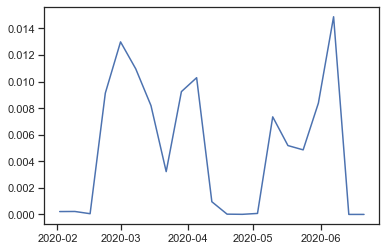

In [42]:
plt.plot(xaxis, np.mean(brk_array, axis=1))

In [43]:
xaxis[5]

Timestamp('2020-03-08 00:00:00', freq='W-SUN')

2020-02-23 00:00:00


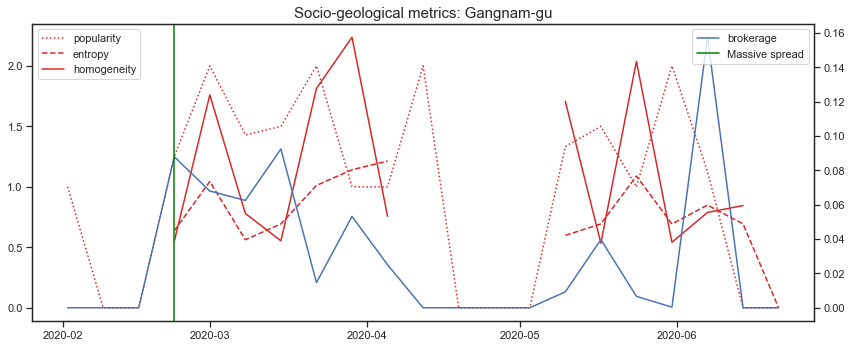

In [60]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

cnt_num = 4

color = 'tab:red'
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Entropy, Popularity, Homogeneity', color=color, fontsize=15)
plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color, )
ax1.tick_params(axis='y')
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('brokerage', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y')
plt.axvline(x=xaxis[3], linestyle='-', color='green', label="Massive spread")
print(xaxis[3])
plt.legend(loc=1)
plt.title('Socio-geological metrics: '+ str(label_dict[cnt_num]), fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

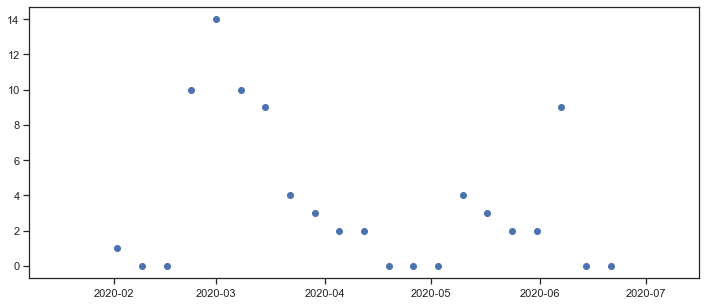

In [66]:
cnt_num = 4
intraffic = np.sum(travel_tensors[:,:,cnt_num], 1) #in-traffic
plt.figure(figsize=(12,5))
plt.scatter(xaxis, intraffic)

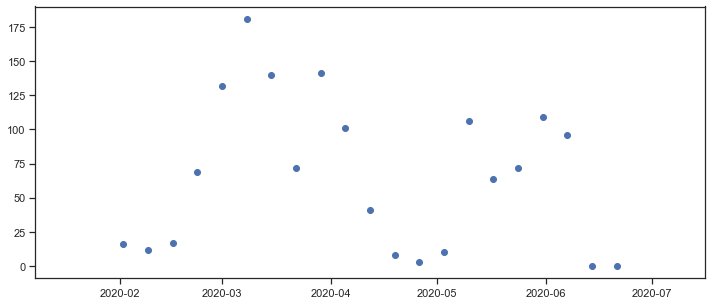

In [64]:
plt.figure(figsize=(12,5))
plt.scatter(xaxis, np.sum(np.sum(travel_tensors, 1), 1))

2020-03-01 00:00:00


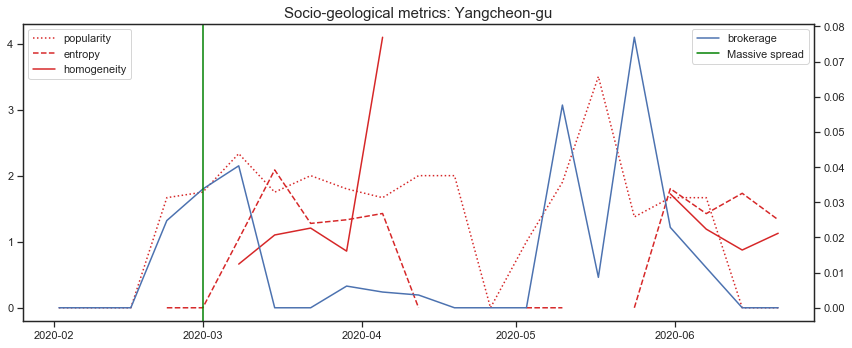

In [70]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

cnt_num = 2

color = 'tab:red'
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Entropy, Popularity, Homogeneity', color=color, fontsize=15)
plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color, )
ax1.tick_params(axis='y')
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('brokerage', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y')
plt.axvline(x=xaxis[4], linestyle='-', color='green', label="Massive spread")
print(xaxis[4])
plt.legend(loc=1)
plt.title('Socio-geological metrics: '+ str(label_dict[cnt_num]), fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

2020-03-08 00:00:00


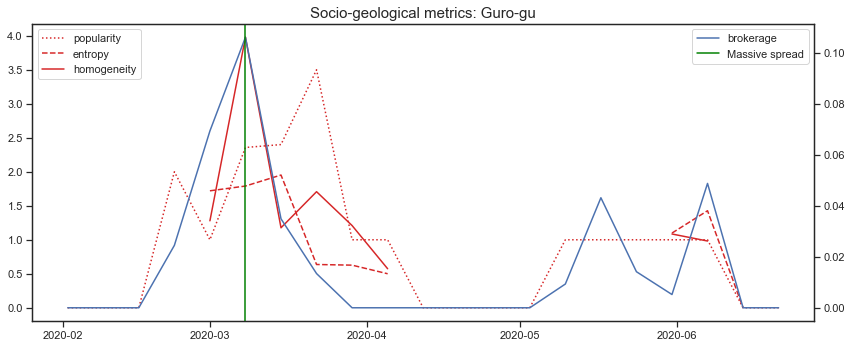

In [44]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

cnt_num = 3

color = 'tab:red'
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Entropy, Popularity, Homogeneity', color=color, fontsize=15)
plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color, )
ax1.tick_params(axis='y')
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('brokerage', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y')
plt.axvline(x=xaxis[5], linestyle='-', color='green', label="Massive spread")
print(xaxis[5])
plt.legend(loc=1)
plt.title('Socio-geological metrics: '+ str(label_dict[cnt_num]), fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

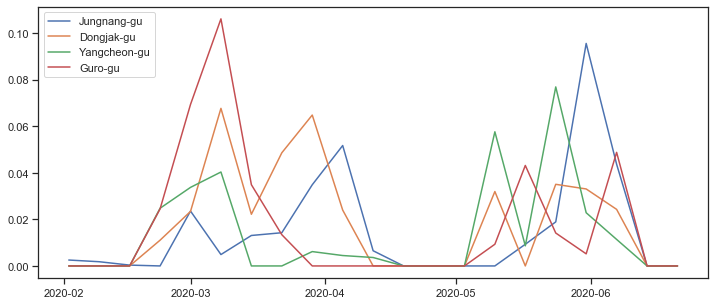

In [45]:
plt.figure(figsize=(12,5))
plt.plot(xaxis, np.array(brk_array)[:,0], label=label_dict[0])
plt.plot(xaxis, np.array(brk_array)[:,1], label=label_dict[1])
plt.plot(xaxis, np.array(brk_array)[:,2], label=label_dict[2])
plt.plot(xaxis, np.array(brk_array)[:,3], label=label_dict[3])
plt.legend()

In [46]:
xaxis[-3]

Timestamp('2020-06-07 00:00:00', freq='W-SUN')

2020-05-31 00:00:00


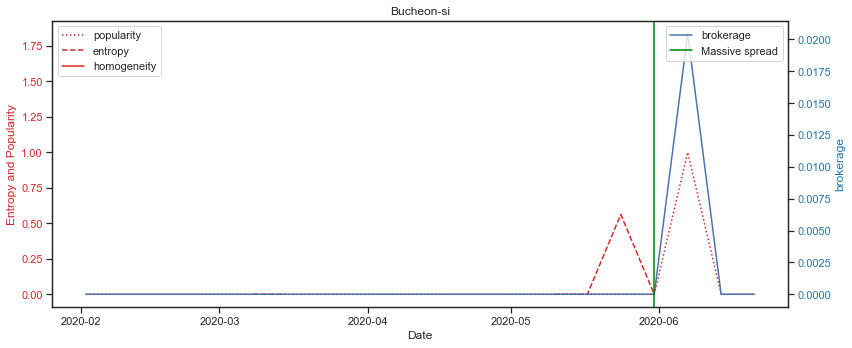

In [47]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

cnt_num = 47

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color, )
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=xaxis[-4], linestyle='-', color='green', label="Massive spread")
print(xaxis[-4])
plt.legend(loc=1)
plt.title(label_dict[cnt_num])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

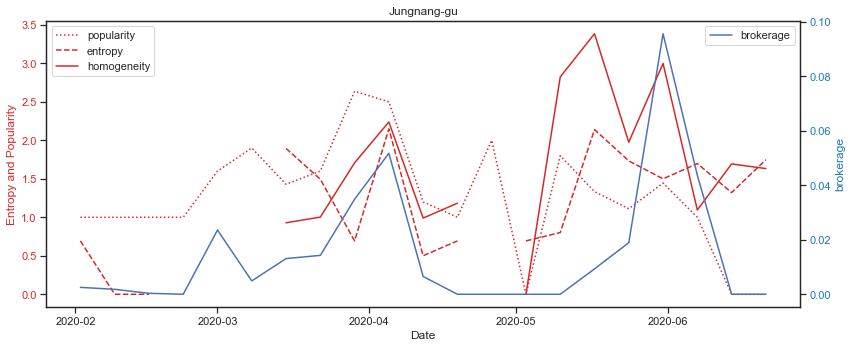

In [48]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
fig, ax1 = plt.subplots(figsize=(12,5))

cnt_num = 0

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Entropy and Popularity', color=color)
plt.plot(xaxis, np.array(pop_list)[:,cnt_num], label="popularity", color=color, linestyle='dotted')
ax1.plot(xaxis, np.array(entropy_list)[:,cnt_num], label="entropy", color=color, linestyle='--')
ax1.plot(xaxis, np.array(homo_list)[:,cnt_num], label="homogeneity", color=color, )
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
ax2.plot(xaxis, np.array(brokerage_list)[:,cnt_num], label="brokerage")
ax2.tick_params(axis='y', labelcolor=color)
# plt.axvline(x=xaxis[14], linestyle='-', color='green', label="Massive spread")
plt.legend(loc=1)
plt.title(label_dict[cnt_num])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

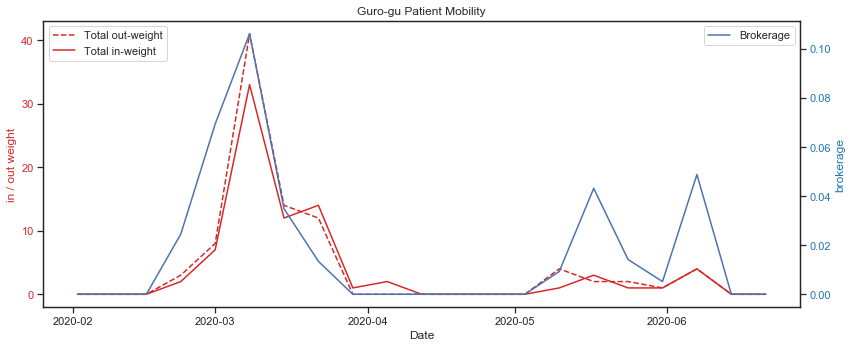

In [49]:
fig, ax1 = plt.subplots(figsize=(12,5))

cnt_num = 3

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('in / out weight', color=color)
plt.plot(xaxis, np.sum(adj_list[:,cnt_num,:], axis=1), color=color, linestyle='--', label = 'Total out-weight')
plt.plot(xaxis, np.sum(adj_list[:,:,cnt_num], axis=1), color=color, label = 'Total in-weight')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('brokerage', color=color)  # we already handled the x-label with ax1
plt.plot(xaxis, brk_array[:,cnt_num], label = 'Brokerage')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc=1)
plt.title(label_dict[cnt_num]+ " Patient Mobility")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [50]:
week_slices[5]

Timestamp('2020-03-01 00:00:00', freq='W-SUN')

In [51]:
xaxis[5]

Timestamp('2020-03-08 00:00:00', freq='W-SUN')

In [52]:
t = 5 # 5 for guro-gu event time
gu = np.array(list(label_dict.values())).astype('object')
bvalue = np.array(brk_array[t])
evalue = np.array(ent_array[t])
hvalue = np.array(hom_array[t], dtype=np.float)
pvalue = np.array(pop_array[t])

br = np.array([gu, pvalue]).T
df = pd.DataFrame(br)
df.columns = ['SIG_ENG_NM', 'brokerage']

In [53]:
gu

array(['Jungnang-gu', 'Dongjak-gu', 'Yangcheon-gu', 'Guro-gu',
       'Gangnam-gu', 'Jung-gu', 'Jongno-gu', 'Eunpyeong-gu', 'Gangseo-gu',
       'Yeongdeungpo-gu', 'Dongdaemun-gu', 'Songpa-gu', 'Seongdong-gu',
       'Geumcheon-gu', 'Gwanak-gu', 'Seocho-gu', 'Seodaemun-gu',
       'Gangbuk-gu', 'Yongsan-gu', 'Nowon-gu', 'Mapo-gu', 'Ansan-si',
       'Seongbuk-gu', 'Goyang-si', 'Seongnam-si', 'Gwangjin-gu',
       'Dobong-gu', 'Namyangju-si', 'Gangdong-gu', 'Anyang-si', 'Guri-si',
       'Suwon-si', 'Paju-si', 'Gwangmyeong-si', 'Gimpo-si', 'Anseong-si',
       'Gunpo-si', 'Uijeongbu-si', 'Gwacheon-si', 'Icheon-si',
       'Pyeongtaek-si', 'Hanam-si', 'Siheung-si', 'Yangpyeong-gun',
       'Dongducheon-si', 'Yongin-si', 'Gwangju-si', 'Bucheon-si',
       'Yeoncheon-gun', 'Yeoju-si', 'Hwaseong-si', 'Uiwang-si',
       'Pocheon-si', 'Osan-si'], dtype=object)

In [54]:
df

SIG_ENG_NM brokerage
0       Jungnang-gu       1.9
1        Dongjak-gu       1.5
2      Yangcheon-gu   2.33333
3           Guro-gu   2.35714
4        Gangnam-gu   1.42857
5           Jung-gu   1.28571
6         Jongno-gu         0
7      Eunpyeong-gu      1.25
8        Gangseo-gu       1.6
9   Yeongdeungpo-gu      2.25
10    Dongdaemun-gu         2
11        Songpa-gu         1
12     Seongdong-gu         0
13     Geumcheon-gu   1.66667
14        Gwanak-gu      1.75
15        Seocho-gu         1
16     Seodaemun-gu       1.5
17       Gangbuk-gu         0
18       Yongsan-gu         1
19         Nowon-gu   1.33333
20          Mapo-gu         3
21         Ansan-si         0
22      Seongbuk-gu         1
23        Goyang-si         2
24      Seongnam-si       1.5
25      Gwangjin-gu         0
26        Dobong-gu         1
27     Namyangju-si         0
28      Gangdong-gu         1
29        Anyang-si         0
30          Guri-si         0
31         Suwon-si         0
32          Paju-si         1
33   Gwangmyeong-si         2
34         Gimpo-si         1
35       Anseong-si         0
36         Gunpo-si         0
37     Uijeongbu-si         0
38      Gwacheon-si         0
39        Icheon-si         0
40    Pyeongtaek-si         0
41         Hanam-si         0
42       Siheung-si         1
43   Yangpyeong-gun         1
44   Dongducheon-si         0
45        Yongin-si         0
46       Gwangju-si         0
47       Bucheon-si         0
48    Yeoncheon-gun         1
49         Yeoju-si         0
50      Hwaseong-si         0
51        Uiwang-si         0
52       Pocheon-si         0
53          Osan-si         0

In [55]:
import folium
m = folium.Map(
    location=[37.5838699,126.9065831],
    zoom_start=11,
    tiles='Stamen Toner'
)

import json
geo_path = './seoul_municipalities_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

folium.Choropleth(geo_data=geo_str, 
                  data=df, 
                  columns=df.columns, 
                  fill_color='OrRd',
                  fill_opacity=1,
                  line_opacity=0.5,
                  key_on='properties.SIG_ENG_NM').add_to(m)

m

In [56]:
t = 5 # 5 for guro-gu
gu = np.array(list(label_dict.values())).astype('object')
bmean = np.mean(brk_array,axis=0)
emean = np.mean(ent_array,axis=0)
hmean = np.mean(np.array(hom_array, dtype=np.float))
pmean = np.mean(pop_array,axis=0)

br = np.array([gu, pmean]).T
df = pd.DataFrame(br)
df.columns = ['SIG_ENG_NM', 'brokerage']

In [57]:
import folium
m = folium.Map(
    location=[37.5838699,127.0565831],
    zoom_start=10,
    tiles='Stamen Toner'
)

import json
geo_path = './seoul_municipalities_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

folium.Choropleth(geo_data=geo_str, 
                  data=df, 
                  columns=df.columns, 
                  fill_color='OrRd',
                  fill_opacity=1,
                  line_opacity=0.5,
                  key_on='properties.SIG_ENG_NM').add_to(m)

m